<a href="https://colab.research.google.com/github/Ru1chi/Market_Segmentation/blob/main/Market_Segmentation_on_Macdonalds_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Load the necessary libraries and dataset:**



In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram




In [11]:
# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')


In [12]:
print(mcdonalds.head())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


### **Check the dimensions and column names:**


In [13]:
print(mcdonalds.shape)
print(mcdonalds.columns)


(1453, 15)
Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


### **Convert categorical responses to binary format (Yes/No to 1/0):**



In [14]:
MD_x = mcdonalds.iloc[:, 0:11]
MD_x = (MD_x == 'Yes').astype(int)


### **Calculate column means and perform PCA:**



In [15]:
col_means = MD_x.mean().round(2)
print(col_means)

pca = PCA()
MD_pca = pca.fit_transform(MD_x)
print(pd.DataFrame(MD_pca).head())


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64
         0         1         2         3         4         5         6   \
0  0.425367 -0.219079  0.663255 -0.401300  0.201705 -0.389767 -0.211982   
1 -0.218638  0.388190 -0.730827 -0.094724  0.044669 -0.086596 -0.095877   
2  0.375415  0.730435 -0.122040  0.692262  0.839643 -0.687406  0.583112   
3 -0.172926 -0.352752 -0.843795  0.206998 -0.681415 -0.036133 -0.054284   
4  0.187057 -0.807610  0.028537  0.548332  0.854074 -0.097305 -0.457043   

         7         8         9         10  
0  0.163235  0.181007  0.515706 -0.567074  
1 -0.034756  0.111476  0.493313 -0.500440  
2  0.364379 -0.322288  0.061759  0.242741  
3 -0.231477 -0.028003 -0.250678 -0.051034  
4  0.171758 -0.074409  0.031897  0.082245  


### **Plot the PCA results:**



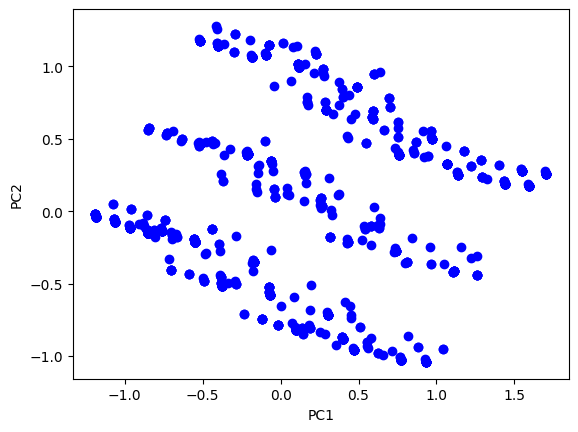

In [17]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


### **K-means clustering:**



In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

np.random.seed(1234)
kmeans = [KMeans(n_clusters=i, n_init=10, random_state=1234).fit(MD_x) for i in range(2, 9)]

# Adjusted Rand Index
# The range of j is now (i+1, 7) to stay within the bounds of the kmeans list.
scores = [adjusted_rand_score(kmeans[i].labels_, kmeans[j].labels_) for i in range(6) for j in range(i+1, 7)]
print(scores)

[0.5867578170199765, 0.3681225204228202, 0.32442460686405544, 0.2624642779536645, 0.2133278706440449, 0.21441551505390408, 0.5895352139290793, 0.5315325370155739, 0.4363277430207138, 0.37282167499241003, 0.3560529413545568, 0.5544831670259551, 0.4837555402669167, 0.4223744845381791, 0.3817014148230745, 0.8733026767488733, 0.7023626389743496, 0.7040033392581939, 0.727360570702741, 0.8159408127393183, 0.7120004187120109]


### **Plotting number of segments:**



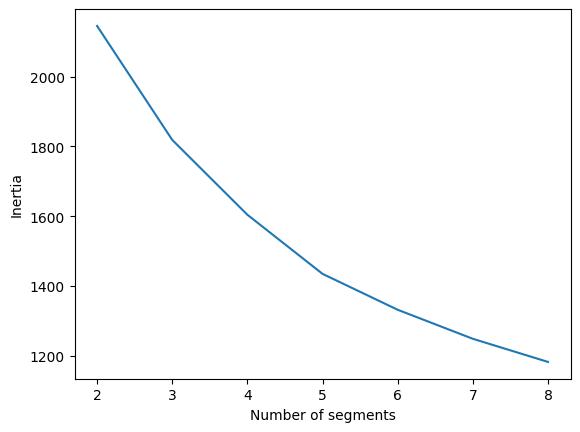

In [20]:
num_clusters = list(range(2, 9))
plt.plot(num_clusters, [k.inertia_ for k in kmeans])
plt.xlabel('Number of segments')
plt.ylabel('Inertia')
plt.show()


### **Reclustering and segment stability:**



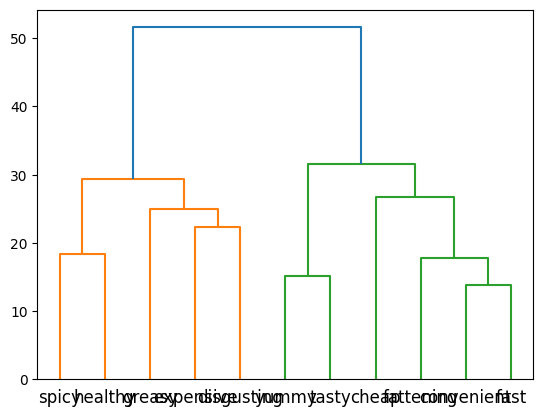

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linkage_matrix = linkage(MD_x.T, 'ward')
dendrogram(linkage_matrix, labels=MD_x.columns)
plt.show()


### **Segment clustering using hierarchical clustering:**



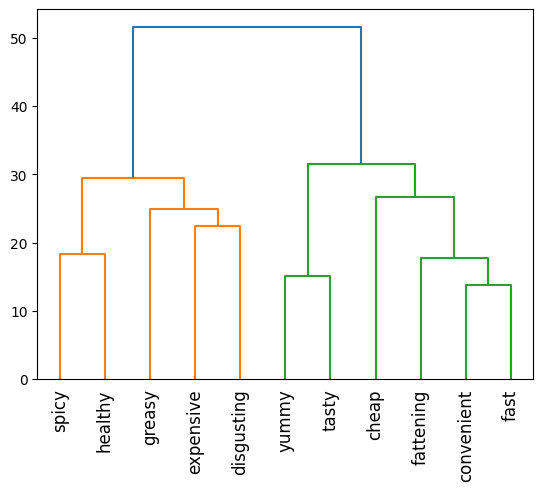

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

MD_vclust = linkage(MD_x.T, 'ward')
dendrogram(MD_vclust, labels=MD_x.columns, leaf_rotation=90)
plt.show()


### **Visualize the clusters:**



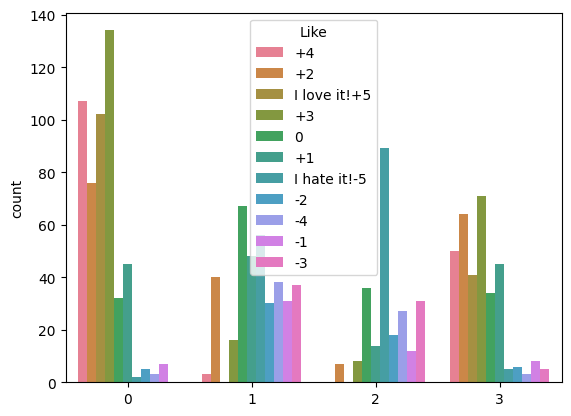

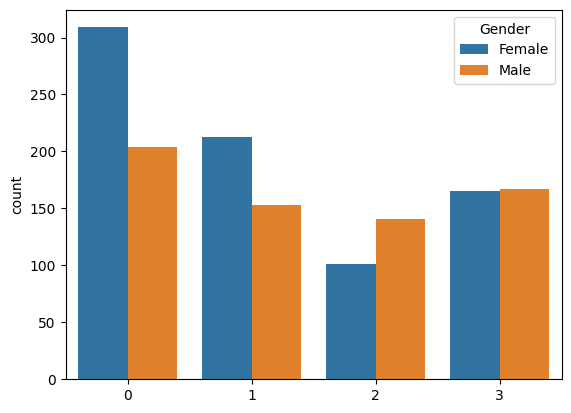

In [23]:
k4 = kmeans[2].labels_  # Assume the 4-cluster solution is at index 2
sns.countplot(x=k4, hue=mcdonalds['Like'])
plt.show()

sns.countplot(x=k4, hue=mcdonalds['Gender'])
plt.show()


### **Decision tree for segments:**



In [29]:
# Print out the columns in mcdonalds to check for the presence of 'Like.n'
print(mcdonalds.columns)



Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
['Female' 'Male']


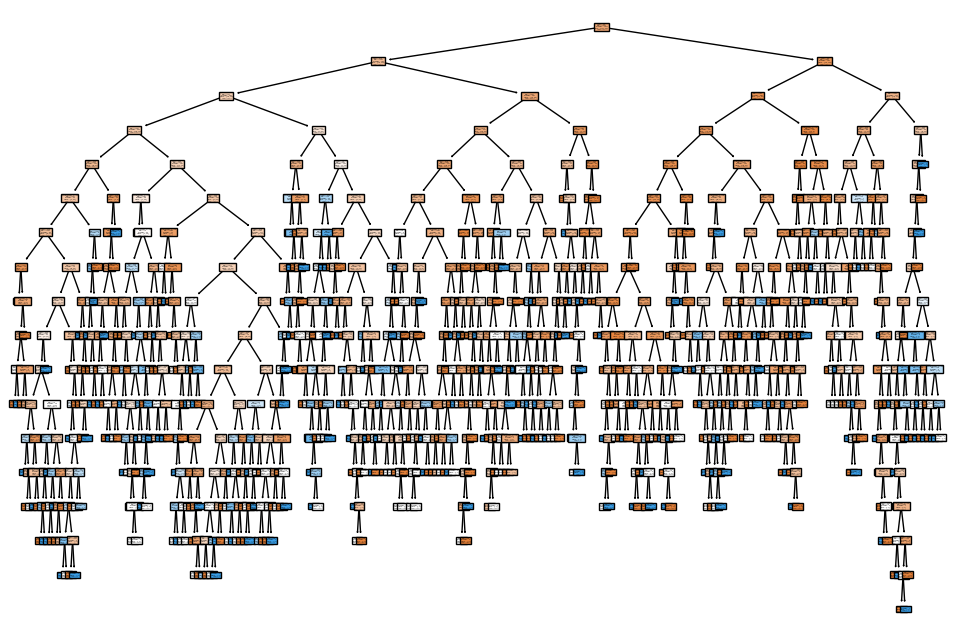

In [34]:

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



print(mcdonalds['VisitFrequency'].unique())
print(mcdonalds['Gender'].unique())

label_encoders = {}
for column in ['VisitFrequency', 'Gender']:
    le = LabelEncoder()
    mcdonalds[column] = le.fit_transform(mcdonalds[column])
    label_encoders[column] = le

mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'], errors='coerce')

mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'])
mcdonalds['Age'] = pd.to_numeric(mcdonalds['Age'])

mcdonalds = mcdonalds.dropna(subset=['Like', 'Age', 'VisitFrequency', 'Gender'])

k4 = np.array(k4, dtype=int)

dtree = DecisionTreeClassifier()
dtree.fit(mcdonalds[['Like', 'Age', 'VisitFrequency', 'Gender']], (k4 == 3).astype(int))

fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(dtree, feature_names=['Like', 'Age', 'VisitFrequency', 'Gender'],
               class_names=['Not 3', '3'], filled=True, ax=ax)
plt.show()


### **Statistical analysis:**



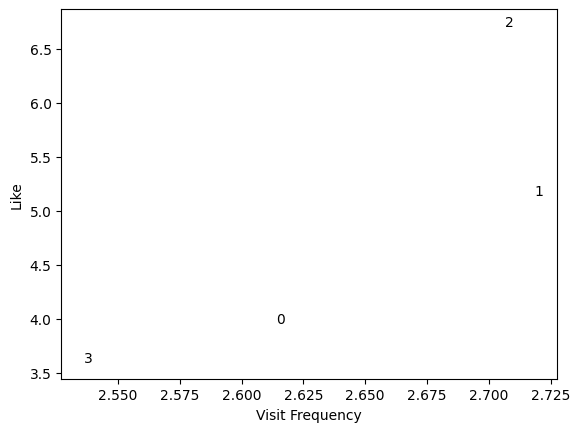

In [35]:
visit = mcdonalds.groupby(k4)['VisitFrequency'].mean()
like = mcdonalds.groupby(k4)['Like'].mean()
female = mcdonalds.groupby(k4)['Gender'].apply(lambda x: (x == 'Female').mean())

plt.scatter(visit, like, s=10 * female)
for i in range(len(visit)):
    plt.text(visit[i], like[i], str(i))
plt.xlabel('Visit Frequency')
plt.ylabel('Like')
plt.show()
